<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/0_ENTREGABLES/3.2_AlgorMejoramientoImg_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.2 Google Colab - Algoritmos de mejoramiento de imágenes en el dominio espacial  <a class="anchor" id="simple" ></a>**

###Equipo 10:

Carlos Roberto Torres Ferguson A01215432

Andrea Carolina Treviño Garza A01034993

Julio Adrián Quintana Gracia A01793661

Pablo Alejandro Colunga Vázquez A01793671

# 4. Image Convolution

## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request

## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

<img src="https://github.com/andreac941/ComputerVision-Eq3/blob/main/data/convolution.png?raw=1" width="70%">

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__. 

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [ ]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [ ]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [ ]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros
    
    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

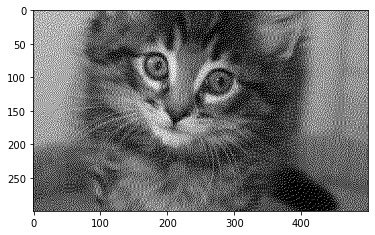

In [ ]:
urllib.request.urlretrieve(
  'https://placekitten.com/500/300',
   "image.jpg")
image = Image.open('image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [ ]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

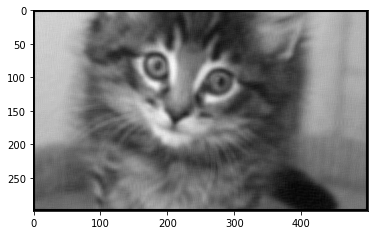

In [ ]:
n = 7
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [ ]:
from PIL import Image

img = Image.open('image.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.

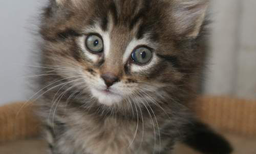

In [ ]:
img

In [ ]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [ ]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [ ]:
input = to_tensor(img)
input.shape


torch.Size([1, 154, 256])

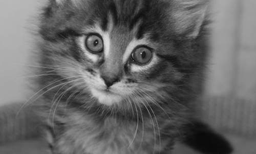

In [ ]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [ ]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [ ]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

tensor([[[-0.2251, -0.3043, -0.3043,  ..., -0.2649, -0.2649, -0.1089],
         [-0.1698, -0.4006, -0.4006,  ..., -0.3496, -0.3497, -0.2635],
         [-0.1677, -0.3981, -0.3981,  ..., -0.3480, -0.3484, -0.2635],
         ...,
         [-0.0847, -0.2022, -0.2033,  ..., -0.2232, -0.2227, -0.1656],
         [-0.0875, -0.2036, -0.2037,  ..., -0.2171, -0.2168, -0.1646],
         [-0.0714, -0.1692, -0.1692,  ..., -0.1758, -0.1751, -0.1249]]],
       grad_fn=<SqueezeBackward1>)

We need to insert a dimension for a batch at dim=0.

In [ ]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 154, 256])

In [ ]:
output = conv(input)
output.shape

torch.Size([1, 1, 154, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [ ]:
output.shape

torch.Size([1, 1, 154, 256])

We need to remove the first dimension before converting to a PIL object.

In [ ]:
output.data.squeeze(dim=0).shape

torch.Size([1, 154, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

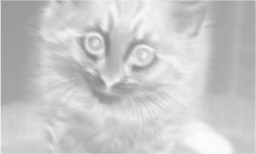

In [ ]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

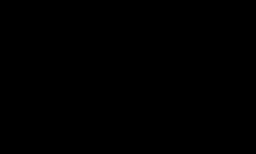

In [ ]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [ ]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

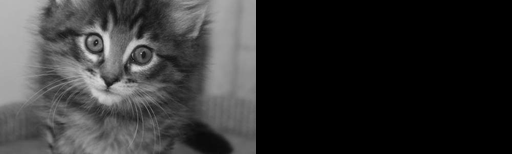

In [ ]:
display(input, output)

### Identity

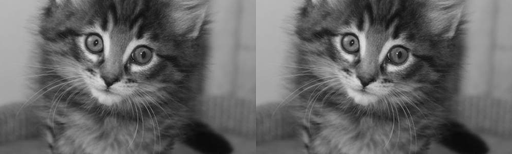

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


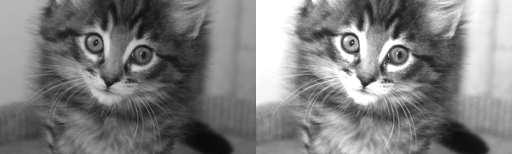

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


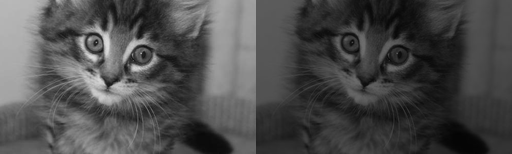

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


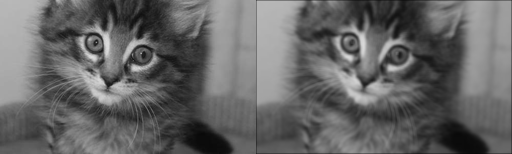

In [ ]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


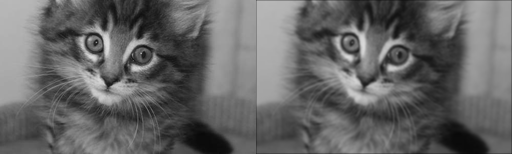

In [ ]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


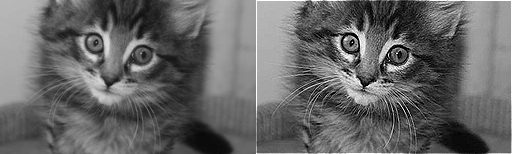

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


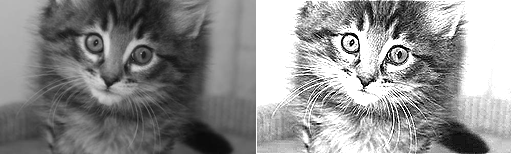

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


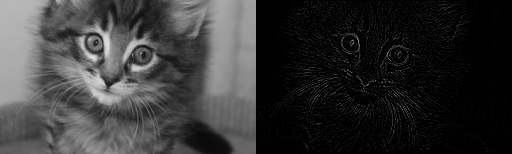

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

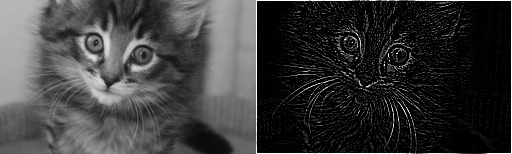

In [ ]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)

#**Ejercicio 1**
Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

**Prewitt**
* Kernel<br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/89e0951634f88eb18d06923df71e89eb83e7fff3'/>
* Magnitude <br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/23ae6772c5f58751fc6014b71d6adafb30a31c79'/>

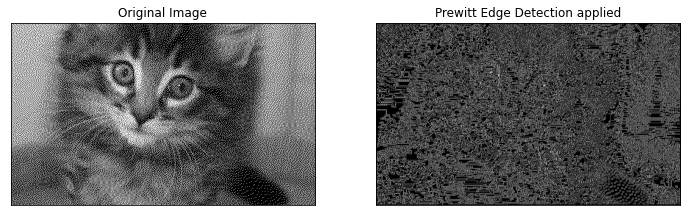

In [ ]:
# Prewitt Operator
# Fuente: https://en.wikipedia.org/wiki/Prewitt_operator

def prewitt(img):
  # kernels
  kx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
  ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

  # apply x-axis kernel
  gx = apply_filter(img, kx)
  # apply y-axis kernel
  gy = apply_filter(img, ky)

  # gradient magnitude
  J = np.sqrt((gx**2) + (gy**2))
  return J

J = prewitt(image)

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [image, J]
titles = ["Original Image", "Prewitt Edge Detection applied"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Podemos observar que el resultado no es muy claro, ya que la imagen original tiene mucho ruido. Por lo que se decidió primeramente suavizar la imagen con el box filter definido al inicio de este archivo y ahora al aplicar nuestra función de detección de bordes de Prewitt observamos un mejor resultado:

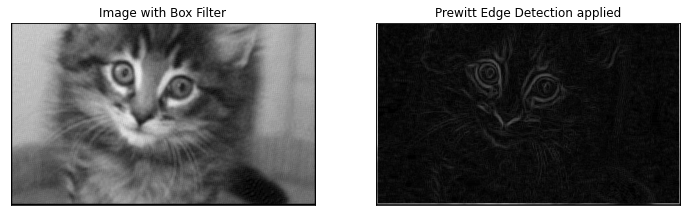

In [ ]:
#Blurring image with Box Filter:
n = 5
H = block_filter(n)
J1 = apply_filter(image, H)

#Applying again Edge Detection with Prewitt operator
J2 = prewitt(J1)

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [J1, J2]
titles = ["Image with Box Filter", "Prewitt Edge Detection applied"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**Sobel**
* Kernel<br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/848abd56e0e33cf402f01183bfe1f68a93fb34a9'/>
* Magnitude <br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/23ae6772c5f58751fc6014b71d6adafb30a31c79'/>

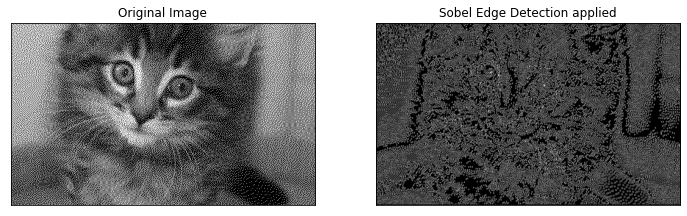

In [ ]:
# Sobel Operator
# Fuente: https://en.wikipedia.org/wiki/Sobel_operator

def sobel(img):
  # kernels
  kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
  ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

  # apply x-axis kernel
  gx = apply_filter(img, kx)
  # apply y-axis kernel
  gy = apply_filter(img, ky)

  # gradient magnitude
  J = np.sqrt((gx**2) + (gy**2))
  return J

J = sobel(image)

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [image, J]
titles = ["Original Image", "Sobel Edge Detection applied"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Nuevamente observamos que el resultado no es muy claro, ya que la imagen original tiene mucho ruido. Por lo que se decidió también suavizar la imagen con el box filter para aplicar posteriormente nuestra función de detección de bordes de Prewitt observamos un mejor resultado:

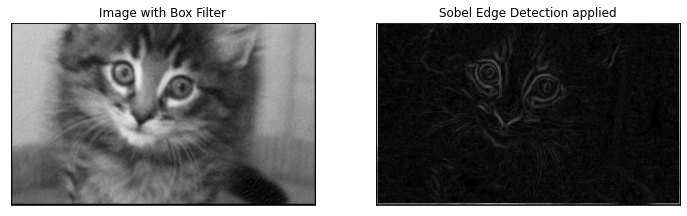

In [ ]:
#Blurring image with Box Filter:
n = 5
H = block_filter(n)
J1 = apply_filter(image, H)

#Applying again Edge Detection with Prewitt operator
J2 = sobel(J1)

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [J1, J2]
titles = ["Image with Box Filter", "Sobel Edge Detection applied"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**Laplace**
* Kernel<br/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/a58cb62fc6fb6a8ecf95edd1060c8a35d50963a4'/>


-4.0
4.0


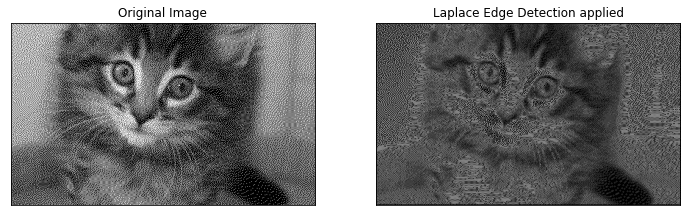

In [ ]:
# Laplace Operator
# Fuente: https://www.tutorialspoint.com/dip/laplacian_operator.htm

def laplace(img):
  # kernel
  k = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

  # apply kernel
  J = apply_filter(image, k)

  # check min and max values
  print(np.min(J))
  print(np.max(J))

  # enhance visibility
  alpha = 2
  J = J * alpha

  # remove values below 0 and/or above 255
  J[J < 0] = 0
  J[J > 255] = 255
  
  return J

J = laplace(image)

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [image, J]
titles = ["Original Image", "Laplace Edge Detection applied"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

-4.0
4.0


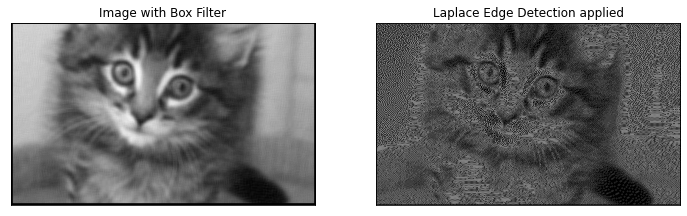

In [ ]:
#Blurring image with Box Filter:
n = 7
H = block_filter(n)
J1 = apply_filter(image, H)

#Applying again Edge Detection with Prewitt operator
J2 = laplace(J1)

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [J1, J2]
titles = ["Image with Box Filter", "Laplace Edge Detection applied"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

De acuerdo al análisis encontrado en el siguiente sitio:
https://arxiv.org/ftp/arxiv/papers/1405/1405.6132.pdf. Podemos hacer comparación entre estos 3 tipos de operadores para detectar bordes:

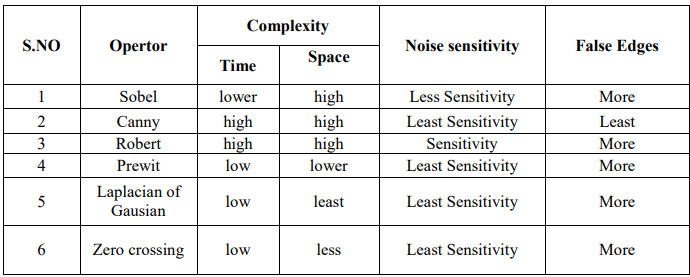

Podemos decir que los filtros kernel de Prewitt son más sencillos de implementar que los de Sobel porque ocupan menor espacio, pero es muy leve la diferencia computacional como para ser considerado un problema. Los kernels de Sobel tienen un efecto "suavizador" en las imágenes, por lo que son mejores supresores de ruido. Mientras que los operadores Laplacianos, a pesar de consistir en la segunda derivada (Prewitt y Sobel son de la primera derivada), su aplicación no significa un aumento en la complejidad computacional, pero sí es mucho más sensible al ruido.

#**Ejercicio 2**
*Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.*

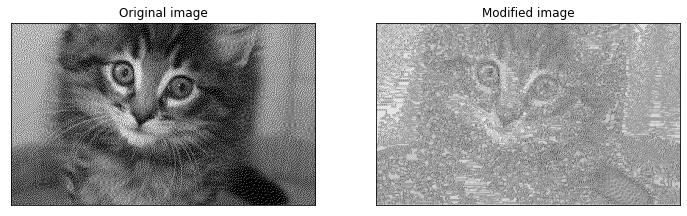

In [ ]:
#Applying Prewitt Edge Detection:
J = prewitt(image)

#Mask operation & alpha definition:
alpha = 2
mask = image - J
result = image + alpha * mask

# Display the images:
fig = plt.figure(figsize=(12, 8))
images = [image, result]
titles = ["Original image", "Modified image"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Incluyendo el paso del "suavizado" para quitar un poco de ruido de la imagen y variando los valores de alpha observamos:

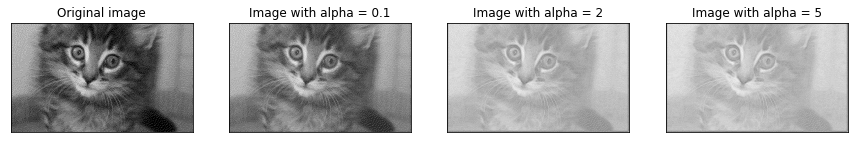

In [ ]:
#Blurring image with Box Filter:
n = 5
H = block_filter(n)
J1 = apply_filter(image, H)

#Applying Prewitt Edge Detection:
J2 = prewitt(J1)

#Mask operation:
mask = image - J2

#Result with different values of alpha:
alpha = 0.1
result_a01 = image + alpha * mask
alpha = 2
result_a2 = image + alpha * mask
alpha = 5
result_a5 = image + alpha * mask

# Display the images:
fig = plt.figure(figsize=(15, 8))
images = [image, result_a01, result_a2, result_a5]
titles = ["Original image","Image with alpha = 0.1", "Image with alpha = 2", "Image with alpha = 5"]
for i in range(4):
  plt.subplot(1,4,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

#**Ejercicio 3**

Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

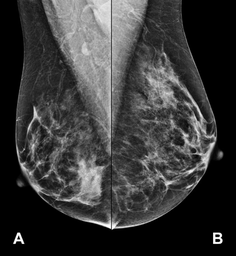

In [ ]:
#Se importan librerías:
import torch, torchvision
from torchvision import transforms
from torch import nn
from PIL import Image

#Se importa imagen médica deseada:
urllib.request.urlretrieve(
  'https://ibcc.clinic/wp-content/uploads/2021/04/IBCC_mamas-946x1024.jpg',
   "img.jpg")
img = Image.open('img.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.
img

torch.Size([1, 256, 236])


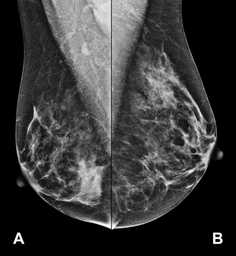

In [ ]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

input = to_tensor(img)
print(input.shape)
to_pil(input)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


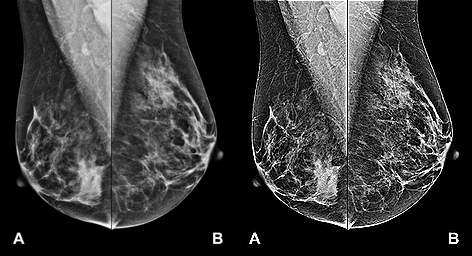

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


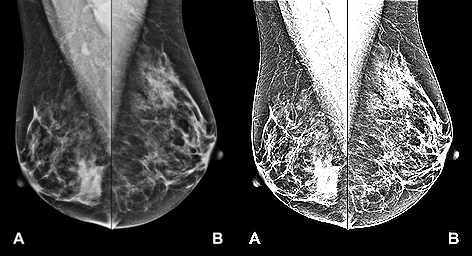

In [ ]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Negativo

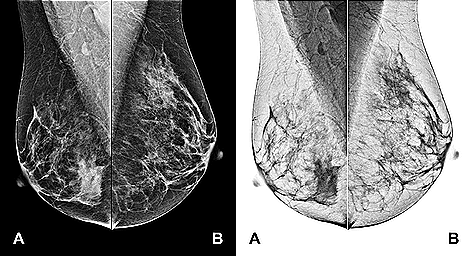

In [ ]:
output3 = transforms.functional.invert(output)
display(output,output3)






La aplicación médica que analizamos es la detección de cancer de mama:

Liga de imagen: https://ibcc.clinic/el-cancer-de-mama/

Para este ejercicio utilizamos las siguientes transformaciones:

a) Filtro "Sharpen" nos ayuda a tener una mejor definición de la imagen, esto para intensificar los colores negros y contrastar los blancos.

b) Transformación a "Negativo" a través de la inversión de colores negro y blanco nos permite identificar la presencia o ausencia de células en colores oscuros contrastado contra el color claro. 

El conjunto de las transformaciones permite comprender los beneficios del uso médico del CVML, en este ejemplo nos permite tener mayor certeza ante algún tumor o situación de advertencia médica.

#**Bibliografía**:
* FIVEKO. (2022, 21 diciembre). Prewitt operator for edge detection. Recuperado 29 de enero de 2023, de https://fiveko.com/prewitt-operator-for-edge-detection/
* Wikipedia contributors. (2022, 6 noviembre). Prewitt operator. Wikipedia. https://en.wikipedia.org/wiki/Prewitt_operator
* FIVEKO. (2022b, diciembre 20). Sobel-Feldman filter: Edge Detection and Gradient Extraction. Recuperado 29 de enero de 2023, de https://fiveko.com/sobel-filter/
* Wikipedia contributors. (2023, 17 enero). Sobel operator. Wikipedia. https://en.wikipedia.org/wiki/Sobel_operator
* TutorialsPoint. (2021, 28 julio). Laplacian Operator. https://www.tutorialspoint.com/dip/laplacian_operator.htm
* Spatial Filters - Laplacian/Laplacian of Gaussian. (s. f.). https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
* Katiyar, S. K., & Arun, P. V. (2012). Comparative analysis of common edge detection techniques in context of object extraction. https://arxiv.org/. Recuperado 29 de enero de 2023, de https://arxiv.org/ftp/arxiv/papers/1405/1405.6132.pdf
* torchvision.transforms — Torchvision 0.11.0 documentation. (s. f.). https://pytorch.org/vision/0.11/transforms.html?highlight=resize